# 数据探索

In [2]:
import pandas as pd
import numpy as np
import random

In [3]:
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(open(r"C:\Users\love_j\Desktop\金融风控\train.csv"))
data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
id                    800000 non-null int64
loanAmnt              800000 non-null float64
term                  800000 non-null int64
interestRate          800000 non-null float64
installment           800000 non-null float64
grade                 800000 non-null object
subGrade              800000 non-null object
employmentTitle       799999 non-null float64
employmentLength      753201 non-null object
homeOwnership         800000 non-null int64
annualIncome          800000 non-null float64
verificationStatus    800000 non-null int64
issueDate             800000 non-null object
isDefault             800000 non-null int64
purpose               800000 non-null int64
postCode              799999 non-null float64
regionCode            800000 non-null int64
dti                   799761 non-null float64
delinquency_2years    800000 non-null float64
ficoRangeLow          800000 non-

In [5]:
# 查看缺失值
data.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    40270
n1                    40270
n2                    40270
n2.1                

In [7]:
# 查看每列数据情况
data.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252015,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [8]:
data["id"].dtypes

dtype('int64')

In [13]:
# 数值型变量，字符型变量
def get_type(data):
    char = []
    numeric = []
    for i in data.columns:
        if data[i].dtypes == 'object':
            char.append(i)
        else: numeric.append(i)
    return char,numeric

In [14]:
char,numeric = get_type(data)

In [22]:
char

['grade', 'subGrade', 'issueDate']

In [24]:
# 填补缺失值
### The function making up missing values in Continuous or Categorical variable
def MakeupMissing(df,col,type,method):
    '''
    :param df: dataset containing columns with missing value
    :param col: columns with missing value
    :param type: the type of the column, should be Continuous or Categorical
    :return: the made up columns
    '''
    #Take the sample with non-missing value in col
    validDf = df.loc[df[col] == df[col]][[col]]          #筛选出此列无缺失值的数据
    if validDf.shape[0] == df.shape[0]:                  #判断是否缺失
        return 'There is no missing value in {}'.format(col)

    #copy the original value from col to protect the original dataframe
    missingList = [i for i in df[col]]
    if type == 'Continuous':
        if method not in ['Mean','Random']:
            return 'Please specify the correct treatment method for missing continuous variable!'
        #get the descriptive statistics of col
        descStats = validDf[col].describe()
        mu = descStats['mean']
        std = descStats['std']
        maxVal = descStats['max']
        #detect the extreme value using 3-sigma method   #如果极值大于均值+3*std，修改极值为均值+3*std
        if maxVal > mu+3*std:
            for i in list(validDf.index):
                if validDf.loc[i][col] > mu+3*std:
                    #decrease the extreme value to normal level
                    validDf.loc[i][col] = mu + 3 * std
            #re-calculate the mean based on cleaned data
            mu = validDf[col].describe()['mean']
        for i in range(df.shape[0]):                    #
            if df.loc[i][col] != df.loc[i][col]:        #筛选出空值，填补空值
                #use the mean or sampled data to replace the missing value
                if method == 'Mean':
                    missingList[i] = mu
                elif method == 'Random':
                    missingList[i] = random.sample(validDf[col].tolist(),1)[0]
    elif type == 'Categorical':
        if method not in ['Mode', 'Random']:
            return 'Please specify the correct treatment method for missing categorical variable!'
        #calculate the probability of each type of the categorical variable
        freqDict = {}
        recdNum = validDf.shape[0]
        for v in set(validDf[col]):
            vDf = validDf.loc[validDf[col] == v]
            freqDict[v] = vDf.shape[0] * 1.0 / recdNum      #变量出现的概率
        #find the category with highest probability
        modeVal = max(freqDict.items(), key=lambda x: x[1])[0]   #筛选最大的概率
        freqTuple = freqDict.items()
        # cumulative sum of each category
        freqList = [0]+[i[1] for i in freqTuple]           #变量的概率值 eg：[0,p1,p2,p3]
        freqCumsum = np.cumsum(freqList)                      # 变量的累加概率值 eg：[0,p1,p1+p2,p1+p2+p3]
        for i in range(df.shape[0]):
            if df.loc[i][col] != df.loc[i][col]:
                if method == 'Mode':
                    missingList[i] = modeVal
                if method == 'Random':
                    #determine the sampled category using unifor distributed random variable
                    a = random.random()
                    position = [k+1 for k in range(len(freqCumsum)-1) if freqCumsum[k]<a<=freqCumsum[k+1]][0]  #a在freqCumsum其中两个值中选后一个值
                    missingList[i] = list(freqTuple)[position-1][0]
    else:
        print ('The missing value in {0} has been made up with the mothod of {1}'.format(col, method))
    return missingList

In [12]:
# numeric.remove("id")

In [55]:
# 填补数值型缺失值
def get_make_missing(data,col):
    for i in col:
        if data[i].isnull().sum() != 0:
            data[i] = MakeupMissing(data,i,'Continuous','Random')
    return data

In [56]:
data = get_make_missing(data,numeric)

In [9]:
# 填补字符型缺失值
def make_char_missing(data,col):
    for i in col:
        if data[i].isnull().sum() != 0:
            data[i] = MakeupMissing(data,i,'Categorical','Random')
    return data

In [25]:
data = make_char_missing(data,char)

In [26]:
data.isnull().sum()

id                    0
loanAmnt              0
term                  0
interestRate          0
installment           0
grade                 0
subGrade              0
employmentTitle       0
employmentLength      0
homeOwnership         0
annualIncome          0
verificationStatus    0
issueDate             0
isDefault             0
purpose               0
postCode              0
regionCode            0
dti                   0
delinquency_2years    0
ficoRangeLow          0
ficoRangeHigh         0
openAcc               0
pubRec                0
pubRecBankruptcies    0
revolBal              0
revolUtil             0
totalAcc              0
initialListStatus     0
applicationType       0
earliesCreditLine     0
title                 0
policyCode            0
n0                    0
n1                    0
n2                    0
n2.1                  0
n4                    0
n5                    0
n6                    0
n7                    0
n8                    0
n9              

In [27]:
data.to_csv("data_miss.csv")

In [28]:
data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,2.0,9.0,10.0,13.0,6.0,13.0,0.0,0.0,0.0,3.0
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,6 years,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [4]:
data = pd.read_csv("data_miss.csv",index_col=0)
data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,2.0,9.0,10.0,13.0,6.0,13.0,0.0,0.0,0.0,3.0
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,6 years,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


# 数据预处理

In [5]:
data['employmentLength'].value_counts(dropna=False).sort_index()

1 year        55738
10+ years    279035
2 years       76837
3 years       68125
4 years       50945
5 years       53207
6 years       39495
7 years       37637
8 years       38498
9 years       32164
< 1 year      68319
Name: employmentLength, dtype: int64

In [6]:
data['employmentLength'].replace(to_replace='10+ years', value='10 years', inplace=True)
data['employmentLength'].replace('< 1 year', '0 years', inplace=True)

def employmentLength_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])
    
data['employmentLength'] = data['employmentLength'].apply(employmentLength_to_int)

In [7]:
data['employmentLength'].value_counts(dropna=False).sort_index()

0      68319
1      55738
2      76837
3      68125
4      50945
5      53207
6      39495
7      37637
8      38498
9      32164
10    279035
Name: employmentLength, dtype: int64

In [8]:
data['earliesCreditLine'].sample(5)

388768    Jul-1990
393230    Apr-2008
173992    May-1998
744216    Oct-1997
106778    Feb-2009
Name: earliesCreditLine, dtype: object

In [9]:
data['earliesCreditLine'] = data['earliesCreditLine'].apply(lambda s: int(s[-4:]))

In [10]:
data['earliesCreditLine'].describe()

count    800000.000000
mean       1998.687231
std           7.606971
min        1944.000000
25%        1995.000000
50%        2000.000000
75%        2004.000000
max        2015.000000
Name: earliesCreditLine, dtype: float64

In [11]:
# 查看各个变量的类别数量
# 部分类别特征
def make_var_count(data,char):
    var_count = []
    for f in char:
        var_count.append([f, data[f].nunique()])
    return pd.DataFrame(var_count,columns=["var","count"])

In [15]:
var_count = make_var_count(data,char)
var_count

,var,count
0,grade,7
1,subGrade,35
2,issueDate,139


In [16]:
# one hot encode
# 类型数在2之上，又不是高维稀疏的
data = pd.get_dummies(data, columns=['grade', 'subGrade'], drop_first=True)

In [17]:
data.head()

,id,loanAmnt,term,interestRate,installment,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,...,subGrade_F1,subGrade_F2,subGrade_F3,subGrade_F4,subGrade_F5,subGrade_G1,subGrade_G2,subGrade_G3,subGrade_G4,subGrade_G5
0,0,35000.0,5,19.52,917.97,320.0,2,2,110000.0,2,...,0,0,0,0,0,0,0,0,0,0
1,1,18000.0,5,18.49,461.90,219843.0,5,0,46000.0,2,...,0,0,0,0,0,0,0,0,0,0
2,2,12000.0,5,16.99,298.17,31698.0,8,0,74000.0,2,...,0,0,0,0,0,0,0,0,0,0
3,3,11000.0,3,7.26,340.96,46854.0,10,1,118000.0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,3000.0,3,12.99,101.07,54.0,6,1,29000.0,2,...,0,0,0,0,0,0,0,0,0,0


# 变量之间的相似性

In [27]:
data.corr()

,id,loanAmnt,term,interestRate,installment,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,...,subGrade_F1,subGrade_F2,subGrade_F3,subGrade_F4,subGrade_F5,subGrade_G1,subGrade_G2,subGrade_G3,subGrade_G4,subGrade_G5
id,1.000000,-0.000064,-0.000941,0.000524,0.000231,-0.000482,0.000362,-0.000135,0.001641,0.002043,...,0.000740,-0.001076,-0.000171,0.000545,-0.000447,-0.001999,0.000060,-0.000318,-0.000397,0.000859
loanAmnt,-0.000064,1.000000,0.381142,0.142288,0.953369,-0.020449,0.084583,-0.141214,0.315361,0.223371,...,0.042618,0.040085,0.034127,0.033769,0.036443,0.032276,0.023908,0.027432,0.023981,0.021444
term,-0.000941,0.381142,1.000000,0.416827,0.142894,0.002271,0.052004,-0.084503,0.051000,0.129071,...,0.105373,0.094228,0.080282,0.078123,0.070425,0.065759,0.052009,0.050571,0.044328,0.037803
interestRate,0.000524,0.142288,0.416827,1.000000,0.154550,0.062398,-0.003088,0.051608,-0.073364,0.255346,...,0.193313,0.174159,0.169547,0.158791,0.151836,0.138086,0.116375,0.106864,0.097908,0.092492
installment,0.000231,0.953369,0.142894,0.154550,1.000000,-0.014739,0.073194,-0.115779,0.305667,0.225758,...,0.040998,0.040332,0.037466,0.037521,0.042382,0.037639,0.029208,0.032386,0.029206,0.027828
employmentTitle,-0.000482,-0.020449,0.002271,0.062398,-0.014739,1.000000,-0.012916,-0.013376,-0.018927,0.010906,...,0.006304,0.008339,0.004334,0.005659,0.004411,0.002805,-0.001366,0.000379,-0.001666,-0.002661
employmentLength,0.000362,0.084583,0.052004,-0.003088,0.073194,-0.012916,1.000000,-0.119535,0.064274,0.027109,...,0.002353,0.001862,-0.000046,0.000775,0.002238,0.000860,0.001748,-0.000723,0.001299,-0.000636
homeOwnership,-0.000135,-0.141214,-0.084503,0.051608,-0.115779,-0.013376,-0.119535,1.000000,-0.117331,-0.007803,...,0.002649,0.003836,0.006459,0.005393,0.002848,0.003460,0.003865,0.000598,0.001131,0.001879
annualIncome,0.001641,0.315361,0.051000,-0.073364,0.305667,-0.018927,0.064274,-0.117331,1.000000,0.040493,...,-0.004378,-0.002750,-0.003477,-0.003375,-0.000148,-0.000554,-0.001812,0.000399,0.000875,0.001086
verificationStatus,0.002043,0.223371,0.129071,0.255346,0.225758,0.010906,0.027109,-0.007803,0.040493,1.000000,...,0.044696,0.043743,0.037661,0.037422,0.035285,0.029219,0.028483,0.025801,0.020741,0.019285


# 训练数据/测试数据准备

In [27]:
# test = pd.read_csv(open(r"C:\Users\love_j\Desktop\金融风控\testA.csv"))
# test.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,800000,14000.0,3,10.99,458.28,B,B3,7027.0,10+ years,0,...,8.0,4.0,15.0,19.0,6.0,17.0,0.0,0.0,1.0,3.0
1,800001,20000.0,5,14.65,472.14,C,C5,60426.0,10+ years,0,...,1.0,3.0,3.0,9.0,3.0,5.0,0.0,0.0,2.0,2.0
2,800002,12000.0,3,19.99,445.91,D,D4,23547.0,2 years,1,...,1.0,36.0,5.0,6.0,4.0,12.0,0.0,0.0,0.0,7.0
3,800003,17500.0,5,14.31,410.02,C,C4,636.0,4 years,0,...,7.0,2.0,8.0,14.0,2.0,10.0,0.0,0.0,0.0,3.0
4,800004,35000.0,3,17.09,1249.42,D,D1,368446.0,< 1 year,1,...,11.0,3.0,16.0,18.0,11.0,19.0,0.0,0.0,0.0,1.0


In [18]:
features = list(data.columns)
features.remove('id')
features.remove('issueDate')
features.remove('isDefault')

In [19]:
features

['loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'employmentLength',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'earliesCreditLine',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n2.1',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'subGrade_A2',
 'subGrade_A3',
 'subGrade_A4',
 'subGrade_A5',
 'subGrade_B1',
 'subGrade_B2',
 'subGrade_B3',
 'subGrade_B4',
 'subGrade_B5',
 'subGrade_C1',
 'subGrade_C2',
 'subGrade_C3',
 'subGrade_C4',
 'subGrade_C5',
 'subGrade_D1',
 'subGrade_D2',
 'subGrade_D3',
 'subGrade_D4',
 'subGrade_D5',
 'subGrade_E1',
 'subGrade_E2',
 'subGrade_E3',
 'subGrade_E4',
 'subGrade_E5

In [20]:
#split the modeling dataset into trainning set and testing set
X_train, X_test, y_train, y_test = train_test_split(data[features],data['isDefault'], test_size=0.3,random_state=9)

# 建立模型

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# learning_rate=0.1,max_delta_step=0, max_depth=3 :80.34%
# learning_rate=0.1,max_delta_step=0, max_depth=4 :80.41%
# learning_rate=0.1,max_depth=5 :80.47%
# learning_rate=0.1,max_depth=7 :80.53%

# learning_rate=0.05,max_depth=4 :80.25%


In [30]:
#建立xgboost模型，训练模型
model = XGBClassifier(learning_rate=0.1,max_depth=7)
model.fit(X_train,y_train)
#预测测试集数据
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:%.2f%%"%(accuracy * 100.0))

accuracy:80.53%


# 变量重要性

In [25]:
feature_importances = model.feature_importances_
feature_importances

array([0.01578804, 0.05435807, 0.2818462 , 0.01532112, 0.01554455,
       0.00618566, 0.03470265, 0.01515887, 0.02815767, 0.00599598,
       0.004673  , 0.0081652 , 0.02754639, 0.00681942, 0.02481163,
       0.        , 0.00401881, 0.00718158, 0.00832764, 0.01114881,
       0.00361068, 0.0082612 , 0.00904886, 0.00469944, 0.00951565,
       0.03904163, 0.        , 0.00551699, 0.00823757, 0.01709373,
       0.01499479, 0.00543697, 0.00376267, 0.00428724, 0.00300685,
       0.00702786, 0.00844057, 0.00443319, 0.        , 0.        ,
       0.00282342, 0.02292182, 0.081453  , 0.        , 0.08350744,
       0.01169576, 0.00610109, 0.        , 0.        , 0.        ,
       0.00277217, 0.00288038, 0.        , 0.        , 0.00256265,
       0.0231921 , 0.01975505, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00302648,
       0.        , 0.        , 0.        , 0.        , 0.00201947,
       0.        , 0.        , 0.00312203, 0.        , 0.     

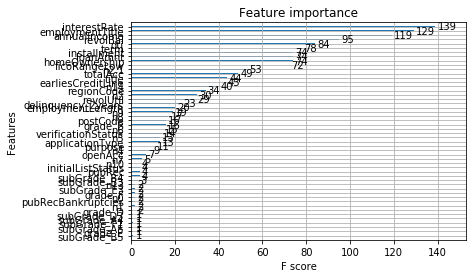

In [26]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
#画重要性
plot_importance(model)
plt.show()